In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/notebooks/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/notebooks/data/train.csv
/notebooks/data/sample_submission.csv
/notebooks/data/test.csv
/notebooks/data/spaceship-titanic.zip


In [3]:
train_data_raw = pd.read_csv("/notebooks/data/train.csv")
predict_data_raw = pd.read_csv("notebooks/data/test.csv")
test_submission = pd.read_csv("/notebooks/data/sample_submission.csv")

In [4]:
# raw
train_data_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.    

`PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.  

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  

`Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either `P` for Port or `S` for Starboard.  

`Destination` - The planet the passenger will be debarking to.  

`Age` - The age of the passenger.  

`VIP` - Whether the passenger has paid for special VIP service during the voyage.  

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  

`Name` - The first and last names of the passenger.  

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.    

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.

`PassengerId` - Id for each passenger in the test set.

`Transported` - The target. For each passenger, predict either True or False.

## Analysis

In [5]:
train_data_raw.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_data_raw.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

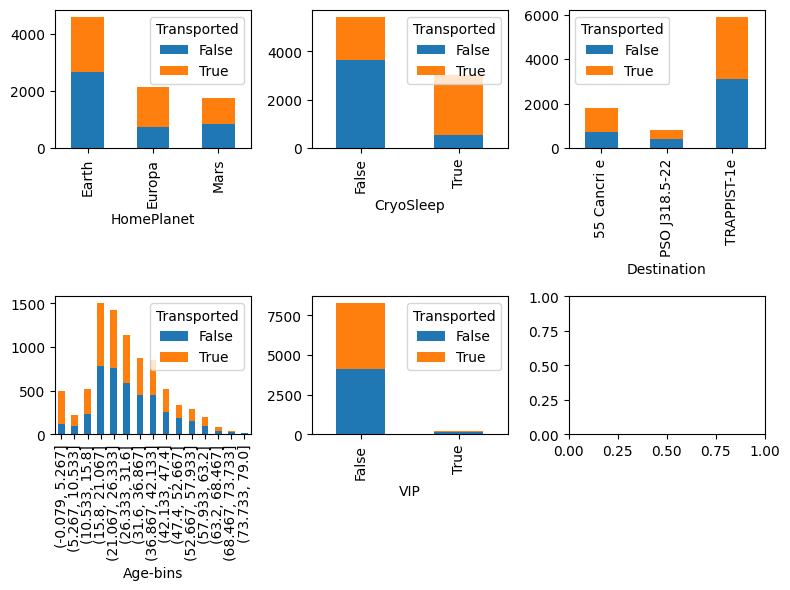

<Figure size 640x480 with 0 Axes>

In [6]:
train_data = train_data_raw.copy()
count = []

homePlanet_count_df = train_data.groupby('HomePlanet')['Transported'].value_counts().unstack()
cryoSleep_count_df = train_data.groupby('CryoSleep')['Transported'].value_counts().unstack()
destination_count_df = train_data.groupby('Destination')['Transported'].value_counts().unstack()
train_data["Age-bins"] = pd.cut(train_data["Age"], bins = 15)
age_count_df = train_data.groupby('Age-bins')['Transported'].value_counts().unstack()
VIP_count_df = train_data.groupby('VIP')['Transported'].value_counts().unstack()

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
plt.figure()
homePlanet_count_df.plot(kind = "bar", stacked=True, ax=axes[0][0])
cryoSleep_count_df.plot(kind = "bar", stacked=True, ax=axes[0][1])
destination_count_df.plot(kind = "bar", stacked=True, ax=axes[0][2])
age_count_df.plot(kind ="bar", stacked=True, ax=axes[1][0])
VIP_count_df.plot(kind ="bar", stacked=True, ax=axes[1][1])
fig.tight_layout()
plt.show()

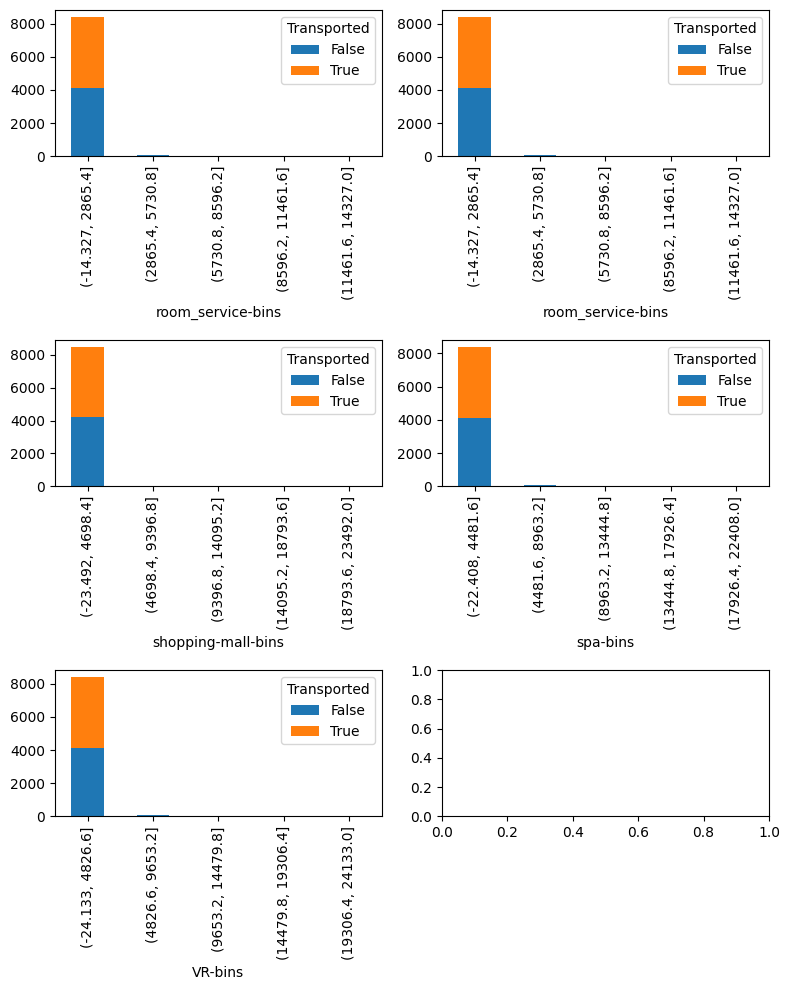

<Figure size 640x480 with 0 Axes>

In [127]:
train_data["room_service-bins"] = pd.cut(train_data["RoomService"], bins = 5)
room_service_count_df = train_data.groupby('room_service-bins')['Transported'].value_counts().unstack()
train_data["food-court-bins"] = pd.cut(train_data["FoodCourt"], bins = 5)
food_court_count_df = train_data.groupby('room_service-bins')['Transported'].value_counts().unstack()
train_data["shopping-mall-bins"] = pd.cut(train_data["ShoppingMall"], bins = 5)
shopping_mall_count_df = train_data.groupby('shopping-mall-bins')['Transported'].value_counts().unstack()
train_data["spa-bins"] = pd.cut(train_data["Spa"], bins = 5)
spa_count_df = train_data.groupby('spa-bins')['Transported'].value_counts().unstack()
train_data["VR-bins"] = pd.cut(train_data["VRDeck"], bins = 5)
vr_deck_count_df = train_data.groupby('VR-bins')['Transported'].value_counts().unstack()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
plt.figure()
room_service_count_df.plot(kind = "bar", stacked=True, ax=axes[0][0])
food_court_count_df.plot(kind = "bar", stacked=True, ax=axes[0][1])
shopping_mall_count_df.plot(kind = "bar", stacked=True, ax=axes[1][0])
spa_count_df.plot(kind="bar", stacked=True, ax=axes[1][1])
vr_deck_count_df.plot(kind="bar", stacked=True, ax=axes[2][0])
fig.tight_layout()
plt.show()

## Data preprocessing

In [208]:
train_data = train_data_raw.copy()
predict_data = predict_data_raw.copy()
features = ["HomePlanet", "CryoSleep", "Age", "VIP", "Destination", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Deck", "Cabin_num", "Side"]
# features = ["HomePlanet", "CryoSleep", "Age", "Destination", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Deck", "Cabin_num", "Side"]
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [209]:
# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
train_data = train_data.drop('Cabin', axis=1)

predict_data[["Deck", "Cabin_num", "Side"]] = predict_data["Cabin"].str.split("/", expand=True)
predict_data = predict_data.drop('Cabin', axis=1)

### Imputing

In [210]:
# train_data['Deck'] = train_data['Deck'].fillna('0')
train_data["Cabin_num"] = train_data["Cabin_num"].fillna(0).astype(int)
# train_data.loc[(train_data['Cabin_num'] == 0), ['Cabin_num']] = math.floor(train_data['Cabin_num'].mean())

predict_data["Cabin_num"] = predict_data["Cabin_num"].fillna(0).astype(int)
# predict_data.loc[(predict_data['Cabin_num'] == 0), ['Cabin_num']] = math.floor(predict_data['Cabin_num']).mean()

numeric_columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())
predict_data[numeric_columns] = predict_data[numeric_columns].fillna(predict_data[numeric_columns].mean())

train_data.loc[(train_data["CryoSleep"] == True), ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0

train_data.isna().sum()
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


Scaling the data between 0 and 1

In [211]:
#Scale
data = train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Cabin_num"]]
min_vals = data.min()
max_vals = data.max()

train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Cabin_num"]] = (data - min_vals)/(max_vals - min_vals)
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.364911,0.015560,0.015241,0.007314,0.013781,0.012542,0.309728
std,0.181507,0.046069,0.053499,0.025442,0.050205,0.046971,0.271320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.080253
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.214889
75%,0.468354,0.004258,0.003119,0.001362,0.003302,0.002445,0.519007
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
import math
import random
from itertools import combinations
def get_subsets(lst, size):
    return list(combinations(lst, size))

def not_in_subset(lst, subset):
    return list(set(lst) - set(subset)) 

subsets = get_subsets(features,11)
len(subsets)

78

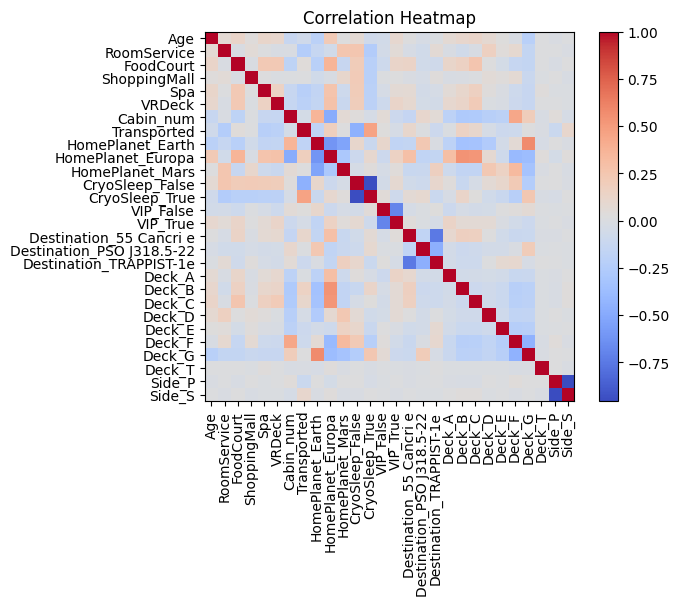

In [135]:
correlation_matrix = pd.get_dummies(train_data[features + ["Transported"]]).corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Add a color bar indicating the scale of the heatmap
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()

## Training

In [212]:
def split_train_val(train_data, features):
    #split train and test sets 
    print("NOTE: Use the whole set to train the model before submitting the predictions!")
    # seperate non-numeric data into columns
    X_data = pd.get_dummies(train_data[features]).astype(float)

    random_state = random.randint(0,100) 
    random_state = 1
    X_train = X_data.sample(math.floor(0.9 * len(train_data)), random_state=random_state)
    X_val = X_data.drop(X_train.index)
    y_train = train_data["Transported"].sample(math.floor(0.9 * len(train_data)), random_state=random_state)
    y_val = train_data["Transported"].drop(y_train.index)

    return (X_train, y_train, X_val, y_val)

In [213]:
X_train, y_train, X_val, y_val = split_train_val(train_data, features)
X_train

NOTE: Use the whole set to train the model before submitting the predictions!


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
1454,0.405063,0.003769,0.126857,0.000000,0.000937,0.000207,0.008976,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
218,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.019007,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7866,0.303797,0.006003,0.022440,0.000043,0.000000,0.000000,0.850053,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7622,0.481013,0.000000,0.000000,0.000000,0.000000,0.000000,0.691658,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4108,0.405063,0.013401,0.000000,0.018772,0.000803,0.000000,0.476241,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,0.443038,0.030153,0.000000,0.016048,0.000000,0.000000,0.317318,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7864,0.253165,0.054512,0.000000,0.001405,0.013885,0.000000,0.910243,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8612,0.443038,0.000000,0.000000,0.000000,0.000000,0.000000,0.782999,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2649,0.240506,0.000000,0.000034,0.000000,0.093047,0.002279,0.045407,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Gradient Boosting Classifier

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

# X_data = pd.get_dummies(train_data[features]).astype(float)
# y_data = train_data["Transported"]

model.fit(X_train, y_train)
# model.fit(X_data, y_data)


#testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

pd.DataFrame({'Variable':X_train.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

train_accuracy = 0.8252588521027738 val_accuracy = 0.8126436781609195


,Variable,Importance
11,CryoSleep_True,0.336667
4,Spa,0.116305
5,VRDeck,0.102748
1,RoomService,0.094731
2,FoodCourt,0.067302
7,HomePlanet_Earth,0.058452
6,Cabin_num,0.055485
3,ShoppingMall,0.029996
0,Age,0.026369
10,CryoSleep_False,0.024303


### random forests

In [191]:
from sklearn.ensemble import RandomForestClassifier

# for subset in subsets:
#     print(set(features) - set(subset))
#     X_train, y_train, X_val, y_val = split_train_val(train_data, list(subset))

# X_data = pd.get_dummies(train_data[features]).astype(float)
# y_data = train_data["Transported"]

#training
model = RandomForestClassifier(n_estimators=50, max_depth=8, criterion="gini", random_state=1)
model.fit(X_train, y_train)
# model.fit(X_data, y_data)

#testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

pd.DataFrame({'Variable':X_train.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

train_accuracy = 0.8330563722357152 val_accuracy = 0.8


,Variable,Importance
11,CryoSleep_True,0.184337
1,RoomService,0.118883
5,VRDeck,0.116528
4,Spa,0.103780
10,CryoSleep_False,0.086251
2,FoodCourt,0.080244
3,ShoppingMall,0.064520
0,Age,0.040992
6,Cabin_num,0.039052
7,HomePlanet_Earth,0.030256


### logistic regresison

In [182]:
from sklearn.linear_model import LogisticRegression
#Training
# X_train, y_train, X_val, y_val = split_train_val(train_data, features)
model = LogisticRegression(random_state=1, max_iter=10000)
model.fit(X_train, y_train)

#Testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

train_accuracy = 0.7697814137798799 val_accuracy = 0.7724137931034483


### SVC

In [183]:
from sklearn.svm import SVC

# X_train, y_train, X_val, y_val = split_train_val(train_data, features)
#training
model = SVC(kernel='rbf', random_state=1)
model.fit(X_train, y_train)

#testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

train_accuracy = 0.7504793557458775 val_accuracy = 0.7459770114942529


In [84]:
from sklearn.neighbors import KNeighborsClassifier

# X_train, y_train, X_val, y_val = split_train_val(train_data, features)
#training
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

#testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

NOTE: Use the whole set to train the model before submitting the predictions!
train_accuracy = 0.7164770548382974 val_accuracy = 0.6068965517241379


## Neural networks

In [225]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from tqdm import tqdm

def batchify_data(x_data, y_data, batch_size):
    """Takes a set of data points and labels and groups them into batches."""
    # Only take batch_size chunks (i.e. drop the remainder)
    N = int(len(x_data) / batch_size) * batch_size
    batches = []
    for i in range(0, N, batch_size):
        batches.append({
            'x': x_data[i:i+batch_size].values,
            'y': y_data[i:i+batch_size].values})
    return batches

def compute_accuracy(predictions, y):
    """Computes the accuracy of predictions against the gold labels, y."""
    return np.mean(np.equal(predictions.numpy(), y))

def run_epoch(data, model, optimizer):
    """Train model for one pass of train data, and return loss, acccuracy"""
    # Gather losses
    losses = []
    batch_accuracies = []

    # If model is in train mode, use optimizer.
    is_training = model.training

    # Iterate through batches
    for batch in tqdm(data):
        # Grab x and y
        x, y = batch['x'], batch['y']

        # Get output predictions
        out = model(torch.tensor(x, dtype = torch.float32))

        # Predict and store accuracy
        predictions = torch.argmax(out, dim=1)
        batch_accuracies.append(compute_accuracy(predictions, y))

        # Compute loss
        loss = F.cross_entropy(out, torch.tensor(y, dtype=torch.long)) # 0.1*sum(torch.norm(p) for p in model.parameters())
        # loss = F.binary_cross_entropy(out, torch.tensor(y, dtype=torch.long))
        losses.append(loss.data.item())

        # If training, do an update.
        if is_training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Calculate epoch level scores
    avg_loss = np.mean(losses)
    avg_accuracy = np.mean(batch_accuracies)
    return avg_loss, avg_accuracy

def train_model(train_data, dev_data, model, lr=0.1, momentum=0.1, nesterov=False, n_epochs=30):
    """Train a model for N epochs given data and hyper-params."""
    # We optimize with SGD
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
    epochs_i = []
    losses_i = []
    val_losses_i = []
    val_accs_i = []

    for epoch in range(1, n_epochs+1):
        print("-------------\nEpoch {}:\n".format(epoch))

        # Run **training***
        loss, acc = run_epoch(train_data, model.train(), optimizer)
        print('Train loss: {:.6f} | Train accuracy: {:.6f}'.format(loss, acc))
        losses_i.append(loss)
        epochs_i.append(epoch)
        # Run **validation**
        val_loss, val_acc = run_epoch(dev_data, model.eval(), optimizer)
        val_losses_i.append(val_loss)
        val_accs_i.append(val_acc)
        print('Val loss:   {:.6f} | Val accuracy:   {:.6f}'.format(val_loss, val_acc))
        # Save model
        torch.save(model, "/notebooks/spaceship-titanic.pt")
    return losses_i, val_losses_i, val_accs_i, epochs_i

In [216]:
# create batches for SGD
batch_size = 32
train_batches = batchify_data(X_train, y_train, batch_size)
test_batches = batchify_data(X_val, y_val, batch_size)
len(train_batches)

244

In [227]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 256),
    nn.LeakyReLU(),
    nn.Linear(256, 256),
    nn.LeakyReLU(),
    nn.Dropout(),
    nn.Linear(256,2)
)
# train the model
losses_i, val_losses_i, val_accs, epochs_i = train_model(train_batches, test_batches, model, lr=0.001, momentum = 0.9, nesterov=True, n_epochs = 200)

# # Evaluate the model on test data
loss, accuracy = run_epoch(test_batches, model.eval(), None)

print ("Loss on test set:"  + str(loss) + " Accuracy on test set: " + str(accuracy))

-------------
Epoch 1:



100%|██████████| 244/244 [00:00<00:00, 627.97it/s]


Train loss: 0.666697 | Train accuracy: 0.641778


100%|██████████| 27/27 [00:00<00:00, 2651.64it/s]


Val loss:   0.632753 | Val accuracy:   0.719907
-------------
Epoch 2:



100%|██████████| 244/244 [00:00<00:00, 730.55it/s]


Train loss: 0.611069 | Train accuracy: 0.702869


100%|██████████| 27/27 [00:00<00:00, 2958.29it/s]


Val loss:   0.577335 | Val accuracy:   0.725694
-------------
Epoch 3:



100%|██████████| 244/244 [00:00<00:00, 736.04it/s]


Train loss: 0.575596 | Train accuracy: 0.714011


100%|██████████| 27/27 [00:00<00:00, 3077.76it/s]


Val loss:   0.553124 | Val accuracy:   0.726852
-------------
Epoch 4:



100%|██████████| 244/244 [00:00<00:00, 779.98it/s]


Train loss: 0.563078 | Train accuracy: 0.713883


100%|██████████| 27/27 [00:00<00:00, 2785.82it/s]


Val loss:   0.543265 | Val accuracy:   0.724537
-------------
Epoch 5:



100%|██████████| 244/244 [00:00<00:00, 799.62it/s]


Train loss: 0.555676 | Train accuracy: 0.717469


100%|██████████| 27/27 [00:00<00:00, 2855.71it/s]


Val loss:   0.536678 | Val accuracy:   0.728009
-------------
Epoch 6:



100%|██████████| 244/244 [00:00<00:00, 671.06it/s]


Train loss: 0.548648 | Train accuracy: 0.719775


100%|██████████| 27/27 [00:00<00:00, 2347.70it/s]


Val loss:   0.531391 | Val accuracy:   0.726852
-------------
Epoch 7:



100%|██████████| 244/244 [00:00<00:00, 675.60it/s]


Train loss: 0.547055 | Train accuracy: 0.719006


100%|██████████| 27/27 [00:00<00:00, 2377.22it/s]


Val loss:   0.527409 | Val accuracy:   0.730324
-------------
Epoch 8:



100%|██████████| 244/244 [00:00<00:00, 669.04it/s]


Train loss: 0.541670 | Train accuracy: 0.721183


100%|██████████| 27/27 [00:00<00:00, 3061.20it/s]


Val loss:   0.523824 | Val accuracy:   0.728009
-------------
Epoch 9:



100%|██████████| 244/244 [00:00<00:00, 647.43it/s]


Train loss: 0.538787 | Train accuracy: 0.725666


100%|██████████| 27/27 [00:00<00:00, 2825.72it/s]


Val loss:   0.520923 | Val accuracy:   0.730324
-------------
Epoch 10:



100%|██████████| 244/244 [00:00<00:00, 707.44it/s]


Train loss: 0.538246 | Train accuracy: 0.722976


100%|██████████| 27/27 [00:00<00:00, 2794.27it/s]


Val loss:   0.518257 | Val accuracy:   0.732639
-------------
Epoch 11:



100%|██████████| 244/244 [00:00<00:00, 630.16it/s]


Train loss: 0.533661 | Train accuracy: 0.726562


100%|██████████| 27/27 [00:00<00:00, 2678.61it/s]


Val loss:   0.515801 | Val accuracy:   0.736111
-------------
Epoch 12:



100%|██████████| 244/244 [00:00<00:00, 694.52it/s]


Train loss: 0.529375 | Train accuracy: 0.726178


100%|██████████| 27/27 [00:00<00:00, 2682.92it/s]


Val loss:   0.514052 | Val accuracy:   0.734954
-------------
Epoch 13:



100%|██████████| 244/244 [00:00<00:00, 725.83it/s]


Train loss: 0.530115 | Train accuracy: 0.728612


100%|██████████| 27/27 [00:00<00:00, 2682.86it/s]


Val loss:   0.512020 | Val accuracy:   0.736111
-------------
Epoch 14:



100%|██████████| 244/244 [00:00<00:00, 622.67it/s]


Train loss: 0.529903 | Train accuracy: 0.726434


100%|██████████| 27/27 [00:00<00:00, 2742.50it/s]


Val loss:   0.510668 | Val accuracy:   0.737269
-------------
Epoch 15:



100%|██████████| 244/244 [00:00<00:00, 676.96it/s]


Train loss: 0.525717 | Train accuracy: 0.729508


100%|██████████| 27/27 [00:00<00:00, 2846.53it/s]


Val loss:   0.508998 | Val accuracy:   0.739583
-------------
Epoch 16:



100%|██████████| 244/244 [00:00<00:00, 777.76it/s]


Train loss: 0.524436 | Train accuracy: 0.730789


100%|██████████| 27/27 [00:00<00:00, 2673.55it/s]


Val loss:   0.507684 | Val accuracy:   0.743056
-------------
Epoch 17:



100%|██████████| 244/244 [00:00<00:00, 774.71it/s]


Train loss: 0.523592 | Train accuracy: 0.732198


100%|██████████| 27/27 [00:00<00:00, 2859.54it/s]


Val loss:   0.506058 | Val accuracy:   0.739583
-------------
Epoch 18:



100%|██████████| 244/244 [00:00<00:00, 761.61it/s]


Train loss: 0.521340 | Train accuracy: 0.731685


100%|██████████| 27/27 [00:00<00:00, 3351.57it/s]


Val loss:   0.504772 | Val accuracy:   0.738426
-------------
Epoch 19:



100%|██████████| 244/244 [00:00<00:00, 762.19it/s]


Train loss: 0.521014 | Train accuracy: 0.735143


100%|██████████| 27/27 [00:00<00:00, 2890.93it/s]


Val loss:   0.503548 | Val accuracy:   0.740741
-------------
Epoch 20:



100%|██████████| 244/244 [00:00<00:00, 688.04it/s]


Train loss: 0.518944 | Train accuracy: 0.731429


100%|██████████| 27/27 [00:00<00:00, 3060.46it/s]


Val loss:   0.502467 | Val accuracy:   0.740741
-------------
Epoch 21:



100%|██████████| 244/244 [00:00<00:00, 789.78it/s]


Train loss: 0.517687 | Train accuracy: 0.736168


100%|██████████| 27/27 [00:00<00:00, 2687.38it/s]


Val loss:   0.501266 | Val accuracy:   0.741898
-------------
Epoch 22:



100%|██████████| 244/244 [00:00<00:00, 800.45it/s]


Train loss: 0.516952 | Train accuracy: 0.733350


100%|██████████| 27/27 [00:00<00:00, 2966.19it/s]


Val loss:   0.500514 | Val accuracy:   0.745370
-------------
Epoch 23:



100%|██████████| 244/244 [00:00<00:00, 813.64it/s]


Train loss: 0.514595 | Train accuracy: 0.738345


100%|██████████| 27/27 [00:00<00:00, 2928.60it/s]


Val loss:   0.499347 | Val accuracy:   0.747685
-------------
Epoch 24:



100%|██████████| 244/244 [00:00<00:00, 784.68it/s]


Train loss: 0.514977 | Train accuracy: 0.736552


100%|██████████| 27/27 [00:00<00:00, 2756.72it/s]


Val loss:   0.498409 | Val accuracy:   0.750000
-------------
Epoch 25:



100%|██████████| 244/244 [00:00<00:00, 763.11it/s]


Train loss: 0.514110 | Train accuracy: 0.735272


100%|██████████| 27/27 [00:00<00:00, 2682.86it/s]


Val loss:   0.497169 | Val accuracy:   0.747685
-------------
Epoch 26:



100%|██████████| 244/244 [00:00<00:00, 780.26it/s]


Train loss: 0.511484 | Train accuracy: 0.736808


100%|██████████| 27/27 [00:00<00:00, 2534.15it/s]


Val loss:   0.496110 | Val accuracy:   0.748843
-------------
Epoch 27:



100%|██████████| 244/244 [00:00<00:00, 785.48it/s]


Train loss: 0.511635 | Train accuracy: 0.737193


100%|██████████| 27/27 [00:00<00:00, 2683.56it/s]


Val loss:   0.495119 | Val accuracy:   0.748843
-------------
Epoch 28:



100%|██████████| 244/244 [00:00<00:00, 778.44it/s]


Train loss: 0.510690 | Train accuracy: 0.737833


100%|██████████| 27/27 [00:00<00:00, 2492.05it/s]


Val loss:   0.494301 | Val accuracy:   0.751157
-------------
Epoch 29:



100%|██████████| 244/244 [00:00<00:00, 773.09it/s]


Train loss: 0.508656 | Train accuracy: 0.740138


100%|██████████| 27/27 [00:00<00:00, 2874.93it/s]


Val loss:   0.493222 | Val accuracy:   0.751157
-------------
Epoch 30:



100%|██████████| 244/244 [00:00<00:00, 793.26it/s]


Train loss: 0.506367 | Train accuracy: 0.741675


100%|██████████| 27/27 [00:00<00:00, 2738.72it/s]


Val loss:   0.492053 | Val accuracy:   0.754630
-------------
Epoch 31:



100%|██████████| 244/244 [00:00<00:00, 755.45it/s]


Train loss: 0.504781 | Train accuracy: 0.742572


100%|██████████| 27/27 [00:00<00:00, 2781.71it/s]


Val loss:   0.490631 | Val accuracy:   0.756944
-------------
Epoch 32:



100%|██████████| 244/244 [00:00<00:00, 747.53it/s]


Train loss: 0.505495 | Train accuracy: 0.741419


100%|██████████| 27/27 [00:00<00:00, 3008.67it/s]


Val loss:   0.489578 | Val accuracy:   0.756944
-------------
Epoch 33:



100%|██████████| 244/244 [00:00<00:00, 799.41it/s]


Train loss: 0.503842 | Train accuracy: 0.742188


100%|██████████| 27/27 [00:00<00:00, 2879.68it/s]


Val loss:   0.488290 | Val accuracy:   0.756944
-------------
Epoch 34:



100%|██████████| 244/244 [00:00<00:00, 772.07it/s]


Train loss: 0.501964 | Train accuracy: 0.742316


100%|██████████| 27/27 [00:00<00:00, 2673.74it/s]


Val loss:   0.487693 | Val accuracy:   0.759259
-------------
Epoch 35:



100%|██████████| 244/244 [00:00<00:00, 665.51it/s]


Train loss: 0.501292 | Train accuracy: 0.746926


100%|██████████| 27/27 [00:00<00:00, 3361.22it/s]


Val loss:   0.486346 | Val accuracy:   0.758102
-------------
Epoch 36:



100%|██████████| 244/244 [00:00<00:00, 791.27it/s]


Train loss: 0.499262 | Train accuracy: 0.749744


100%|██████████| 27/27 [00:00<00:00, 2843.17it/s]


Val loss:   0.485148 | Val accuracy:   0.760417
-------------
Epoch 37:



100%|██████████| 244/244 [00:00<00:00, 790.80it/s]


Train loss: 0.498232 | Train accuracy: 0.746030


100%|██████████| 27/27 [00:00<00:00, 3217.95it/s]


Val loss:   0.484239 | Val accuracy:   0.762731
-------------
Epoch 38:



100%|██████████| 244/244 [00:00<00:00, 794.31it/s]


Train loss: 0.497595 | Train accuracy: 0.748975


100%|██████████| 27/27 [00:00<00:00, 2857.59it/s]


Val loss:   0.482995 | Val accuracy:   0.759259
-------------
Epoch 39:



100%|██████████| 244/244 [00:00<00:00, 785.83it/s]


Train loss: 0.493998 | Train accuracy: 0.751409


100%|██████████| 27/27 [00:00<00:00, 2697.56it/s]


Val loss:   0.481835 | Val accuracy:   0.763889
-------------
Epoch 40:



100%|██████████| 244/244 [00:00<00:00, 785.87it/s]


Train loss: 0.492326 | Train accuracy: 0.751025


100%|██████████| 27/27 [00:00<00:00, 2751.23it/s]


Val loss:   0.480212 | Val accuracy:   0.766204
-------------
Epoch 41:



100%|██████████| 244/244 [00:00<00:00, 796.79it/s]


Train loss: 0.493847 | Train accuracy: 0.752049


100%|██████████| 27/27 [00:00<00:00, 3290.22it/s]


Val loss:   0.479377 | Val accuracy:   0.760417
-------------
Epoch 42:



100%|██████████| 244/244 [00:00<00:00, 781.34it/s]


Train loss: 0.490493 | Train accuracy: 0.753970


100%|██████████| 27/27 [00:00<00:00, 2469.17it/s]


Val loss:   0.478439 | Val accuracy:   0.759259
-------------
Epoch 43:



100%|██████████| 244/244 [00:00<00:00, 782.08it/s]


Train loss: 0.487346 | Train accuracy: 0.757044


100%|██████████| 27/27 [00:00<00:00, 2320.52it/s]


Val loss:   0.477339 | Val accuracy:   0.762731
-------------
Epoch 44:



100%|██████████| 244/244 [00:00<00:00, 795.79it/s]


Train loss: 0.487118 | Train accuracy: 0.754483


100%|██████████| 27/27 [00:00<00:00, 2670.15it/s]


Val loss:   0.475304 | Val accuracy:   0.765046
-------------
Epoch 45:



100%|██████████| 244/244 [00:00<00:00, 717.46it/s]


Train loss: 0.486802 | Train accuracy: 0.752305


100%|██████████| 27/27 [00:00<00:00, 2902.04it/s]


Val loss:   0.474690 | Val accuracy:   0.765046
-------------
Epoch 46:



100%|██████████| 244/244 [00:00<00:00, 735.71it/s]


Train loss: 0.485837 | Train accuracy: 0.758837


100%|██████████| 27/27 [00:00<00:00, 3099.92it/s]


Val loss:   0.473308 | Val accuracy:   0.765046
-------------
Epoch 47:



100%|██████████| 244/244 [00:00<00:00, 784.10it/s]


Train loss: 0.483078 | Train accuracy: 0.759734


100%|██████████| 27/27 [00:00<00:00, 2342.02it/s]


Val loss:   0.472031 | Val accuracy:   0.766204
-------------
Epoch 48:



100%|██████████| 244/244 [00:00<00:00, 655.24it/s]


Train loss: 0.481557 | Train accuracy: 0.755123


100%|██████████| 27/27 [00:00<00:00, 2984.01it/s]


Val loss:   0.470488 | Val accuracy:   0.765046
-------------
Epoch 49:



100%|██████████| 244/244 [00:00<00:00, 787.52it/s]


Train loss: 0.478542 | Train accuracy: 0.760502


100%|██████████| 27/27 [00:00<00:00, 2529.57it/s]


Val loss:   0.469346 | Val accuracy:   0.766204
-------------
Epoch 50:



100%|██████████| 244/244 [00:00<00:00, 782.24it/s]


Train loss: 0.478585 | Train accuracy: 0.758069


100%|██████████| 27/27 [00:00<00:00, 2150.97it/s]


Val loss:   0.468011 | Val accuracy:   0.762731
-------------
Epoch 51:



100%|██████████| 244/244 [00:00<00:00, 785.93it/s]


Train loss: 0.474887 | Train accuracy: 0.763064


100%|██████████| 27/27 [00:00<00:00, 2743.77it/s]


Val loss:   0.466773 | Val accuracy:   0.768519
-------------
Epoch 52:



100%|██████████| 244/244 [00:00<00:00, 702.54it/s]


Train loss: 0.475008 | Train accuracy: 0.761142


100%|██████████| 27/27 [00:00<00:00, 3130.34it/s]


Val loss:   0.465623 | Val accuracy:   0.766204
-------------
Epoch 53:



100%|██████████| 244/244 [00:00<00:00, 784.81it/s]


Train loss: 0.471758 | Train accuracy: 0.767290


100%|██████████| 27/27 [00:00<00:00, 2354.78it/s]


Val loss:   0.464223 | Val accuracy:   0.766204
-------------
Epoch 54:



100%|██████████| 244/244 [00:00<00:00, 704.91it/s]


Train loss: 0.470576 | Train accuracy: 0.761911


100%|██████████| 27/27 [00:00<00:00, 2995.77it/s]


Val loss:   0.463164 | Val accuracy:   0.771991
-------------
Epoch 55:



100%|██████████| 244/244 [00:00<00:00, 742.35it/s]


Train loss: 0.467901 | Train accuracy: 0.766906


100%|██████████| 27/27 [00:00<00:00, 3130.16it/s]


Val loss:   0.462483 | Val accuracy:   0.771991
-------------
Epoch 56:



100%|██████████| 244/244 [00:00<00:00, 777.15it/s]


Train loss: 0.467613 | Train accuracy: 0.767546


100%|██████████| 27/27 [00:00<00:00, 2629.11it/s]


Val loss:   0.461253 | Val accuracy:   0.768519
-------------
Epoch 57:



100%|██████████| 244/244 [00:00<00:00, 782.90it/s]


Train loss: 0.464307 | Train accuracy: 0.767674


100%|██████████| 27/27 [00:00<00:00, 2705.03it/s]


Val loss:   0.459963 | Val accuracy:   0.771991
-------------
Epoch 58:



100%|██████████| 244/244 [00:00<00:00, 751.69it/s]


Train loss: 0.462150 | Train accuracy: 0.773181


100%|██████████| 27/27 [00:00<00:00, 3148.53it/s]


Val loss:   0.459105 | Val accuracy:   0.769676
-------------
Epoch 59:



100%|██████████| 244/244 [00:00<00:00, 635.98it/s]


Train loss: 0.461613 | Train accuracy: 0.770108


100%|██████████| 27/27 [00:00<00:00, 3268.10it/s]


Val loss:   0.456846 | Val accuracy:   0.775463
-------------
Epoch 60:



100%|██████████| 244/244 [00:00<00:00, 799.47it/s]


Train loss: 0.460450 | Train accuracy: 0.775231


100%|██████████| 27/27 [00:00<00:00, 2801.60it/s]


Val loss:   0.456722 | Val accuracy:   0.774306
-------------
Epoch 61:



100%|██████████| 244/244 [00:00<00:00, 731.46it/s]


Train loss: 0.456892 | Train accuracy: 0.774718


100%|██████████| 27/27 [00:00<00:00, 2928.68it/s]


Val loss:   0.454729 | Val accuracy:   0.780093
-------------
Epoch 62:



100%|██████████| 244/244 [00:00<00:00, 758.75it/s]


Train loss: 0.455482 | Train accuracy: 0.774718


100%|██████████| 27/27 [00:00<00:00, 3141.28it/s]


Val loss:   0.454975 | Val accuracy:   0.773148
-------------
Epoch 63:



100%|██████████| 244/244 [00:00<00:00, 728.94it/s]


Train loss: 0.453572 | Train accuracy: 0.776127


100%|██████████| 27/27 [00:00<00:00, 2940.09it/s]


Val loss:   0.452936 | Val accuracy:   0.777778
-------------
Epoch 64:



100%|██████████| 244/244 [00:00<00:00, 746.69it/s]


Train loss: 0.454220 | Train accuracy: 0.777408


100%|██████████| 27/27 [00:00<00:00, 3033.00it/s]


Val loss:   0.452012 | Val accuracy:   0.776620
-------------
Epoch 65:



100%|██████████| 244/244 [00:00<00:00, 749.45it/s]


Train loss: 0.451240 | Train accuracy: 0.777408


100%|██████████| 27/27 [00:00<00:00, 2729.75it/s]


Val loss:   0.452948 | Val accuracy:   0.773148
-------------
Epoch 66:



100%|██████████| 244/244 [00:00<00:00, 702.50it/s]


Train loss: 0.449639 | Train accuracy: 0.777920


100%|██████████| 27/27 [00:00<00:00, 3003.24it/s]


Val loss:   0.450968 | Val accuracy:   0.773148
-------------
Epoch 67:



100%|██████████| 244/244 [00:00<00:00, 722.61it/s]


Train loss: 0.447910 | Train accuracy: 0.779841


100%|██████████| 27/27 [00:00<00:00, 2930.27it/s]


Val loss:   0.451202 | Val accuracy:   0.771991
-------------
Epoch 68:



100%|██████████| 244/244 [00:00<00:00, 726.82it/s]


Train loss: 0.445836 | Train accuracy: 0.778176


100%|██████████| 27/27 [00:00<00:00, 2793.58it/s]


Val loss:   0.449508 | Val accuracy:   0.773148
-------------
Epoch 69:



100%|██████████| 244/244 [00:00<00:00, 667.25it/s]


Train loss: 0.443130 | Train accuracy: 0.779841


100%|██████████| 27/27 [00:00<00:00, 2174.72it/s]


Val loss:   0.448554 | Val accuracy:   0.774306
-------------
Epoch 70:



100%|██████████| 244/244 [00:00<00:00, 723.73it/s]


Train loss: 0.443638 | Train accuracy: 0.778817


100%|██████████| 27/27 [00:00<00:00, 3180.18it/s]


Val loss:   0.448863 | Val accuracy:   0.770833
-------------
Epoch 71:



100%|██████████| 244/244 [00:00<00:00, 727.43it/s]


Train loss: 0.441832 | Train accuracy: 0.779585


100%|██████████| 27/27 [00:00<00:00, 2448.09it/s]


Val loss:   0.446224 | Val accuracy:   0.770833
-------------
Epoch 72:



100%|██████████| 244/244 [00:00<00:00, 753.73it/s]


Train loss: 0.439479 | Train accuracy: 0.786885


100%|██████████| 27/27 [00:00<00:00, 3225.38it/s]


Val loss:   0.444573 | Val accuracy:   0.777778
-------------
Epoch 73:



100%|██████████| 244/244 [00:00<00:00, 753.41it/s]


Train loss: 0.437916 | Train accuracy: 0.783171


100%|██████████| 27/27 [00:00<00:00, 3169.50it/s]


Val loss:   0.445953 | Val accuracy:   0.773148
-------------
Epoch 74:



100%|██████████| 244/244 [00:00<00:00, 656.82it/s]


Train loss: 0.435193 | Train accuracy: 0.785861


100%|██████████| 27/27 [00:00<00:00, 3090.44it/s]


Val loss:   0.447397 | Val accuracy:   0.768519
-------------
Epoch 75:



100%|██████████| 244/244 [00:00<00:00, 741.86it/s]


Train loss: 0.434761 | Train accuracy: 0.785348


100%|██████████| 27/27 [00:00<00:00, 3425.06it/s]


Val loss:   0.442893 | Val accuracy:   0.773148
-------------
Epoch 76:



100%|██████████| 244/244 [00:00<00:00, 726.70it/s]


Train loss: 0.433182 | Train accuracy: 0.788422


100%|██████████| 27/27 [00:00<00:00, 2907.18it/s]


Val loss:   0.441461 | Val accuracy:   0.781250
-------------
Epoch 77:



100%|██████████| 244/244 [00:00<00:00, 699.10it/s]


Train loss: 0.432895 | Train accuracy: 0.785605


100%|██████████| 27/27 [00:00<00:00, 2844.38it/s]


Val loss:   0.441116 | Val accuracy:   0.774306
-------------
Epoch 78:



100%|██████████| 244/244 [00:00<00:00, 680.49it/s]


Train loss: 0.430748 | Train accuracy: 0.787013


100%|██████████| 27/27 [00:00<00:00, 2309.36it/s]


Val loss:   0.442643 | Val accuracy:   0.773148
-------------
Epoch 79:



100%|██████████| 244/244 [00:00<00:00, 664.35it/s]


Train loss: 0.427639 | Train accuracy: 0.786501


100%|██████████| 27/27 [00:00<00:00, 3187.25it/s]


Val loss:   0.439376 | Val accuracy:   0.776620
-------------
Epoch 80:



100%|██████████| 244/244 [00:00<00:00, 709.18it/s]


Train loss: 0.428682 | Train accuracy: 0.788422


100%|██████████| 27/27 [00:00<00:00, 3056.25it/s]


Val loss:   0.436896 | Val accuracy:   0.780093
-------------
Epoch 81:



100%|██████████| 244/244 [00:00<00:00, 704.36it/s]


Train loss: 0.428360 | Train accuracy: 0.786757


100%|██████████| 27/27 [00:00<00:00, 2979.30it/s]


Val loss:   0.437334 | Val accuracy:   0.775463
-------------
Epoch 82:



100%|██████████| 244/244 [00:00<00:00, 733.02it/s]


Train loss: 0.425774 | Train accuracy: 0.788934


100%|██████████| 27/27 [00:00<00:00, 3516.96it/s]


Val loss:   0.437020 | Val accuracy:   0.780093
-------------
Epoch 83:



100%|██████████| 244/244 [00:00<00:00, 721.19it/s]


Train loss: 0.428003 | Train accuracy: 0.788038


100%|██████████| 27/27 [00:00<00:00, 3378.57it/s]


Val loss:   0.437503 | Val accuracy:   0.780093
-------------
Epoch 84:



100%|██████████| 244/244 [00:00<00:00, 737.29it/s]


Train loss: 0.423169 | Train accuracy: 0.789447


100%|██████████| 27/27 [00:00<00:00, 3553.27it/s]


Val loss:   0.436572 | Val accuracy:   0.778935
-------------
Epoch 85:



100%|██████████| 244/244 [00:00<00:00, 631.92it/s]


Train loss: 0.423686 | Train accuracy: 0.790471


100%|██████████| 27/27 [00:00<00:00, 2616.78it/s]


Val loss:   0.434706 | Val accuracy:   0.783565
-------------
Epoch 86:



100%|██████████| 244/244 [00:00<00:00, 678.57it/s]


Train loss: 0.421132 | Train accuracy: 0.791624


100%|██████████| 27/27 [00:00<00:00, 2721.61it/s]


Val loss:   0.434830 | Val accuracy:   0.778935
-------------
Epoch 87:



100%|██████████| 244/244 [00:00<00:00, 526.91it/s]


Train loss: 0.420088 | Train accuracy: 0.794185


100%|██████████| 27/27 [00:00<00:00, 2786.57it/s]


Val loss:   0.433404 | Val accuracy:   0.777778
-------------
Epoch 88:



100%|██████████| 244/244 [00:00<00:00, 698.03it/s]


Train loss: 0.418065 | Train accuracy: 0.792392


100%|██████████| 27/27 [00:00<00:00, 2815.88it/s]


Val loss:   0.435164 | Val accuracy:   0.781250
-------------
Epoch 89:



100%|██████████| 244/244 [00:00<00:00, 633.73it/s]


Train loss: 0.418942 | Train accuracy: 0.790087


100%|██████████| 27/27 [00:00<00:00, 3265.27it/s]


Val loss:   0.432960 | Val accuracy:   0.778935
-------------
Epoch 90:



100%|██████████| 244/244 [00:00<00:00, 737.19it/s]


Train loss: 0.418844 | Train accuracy: 0.795210


100%|██████████| 27/27 [00:00<00:00, 3546.92it/s]


Val loss:   0.434883 | Val accuracy:   0.781250
-------------
Epoch 91:



100%|██████████| 244/244 [00:00<00:00, 712.41it/s]


Train loss: 0.415279 | Train accuracy: 0.794954


100%|██████████| 27/27 [00:00<00:00, 3447.06it/s]


Val loss:   0.431259 | Val accuracy:   0.775463
-------------
Epoch 92:



100%|██████████| 244/244 [00:00<00:00, 717.07it/s]


Train loss: 0.413352 | Train accuracy: 0.797003


100%|██████████| 27/27 [00:00<00:00, 3590.67it/s]


Val loss:   0.430359 | Val accuracy:   0.780093
-------------
Epoch 93:



100%|██████████| 244/244 [00:00<00:00, 694.30it/s]


Train loss: 0.414731 | Train accuracy: 0.794570


100%|██████████| 27/27 [00:00<00:00, 2757.53it/s]


Val loss:   0.431126 | Val accuracy:   0.785880
-------------
Epoch 94:



100%|██████████| 244/244 [00:00<00:00, 701.36it/s]


Train loss: 0.416242 | Train accuracy: 0.795082


100%|██████████| 27/27 [00:00<00:00, 3122.74it/s]


Val loss:   0.432325 | Val accuracy:   0.780093
-------------
Epoch 95:



100%|██████████| 244/244 [00:00<00:00, 696.41it/s]


Train loss: 0.414961 | Train accuracy: 0.799565


100%|██████████| 27/27 [00:00<00:00, 2924.29it/s]


Val loss:   0.431962 | Val accuracy:   0.781250
-------------
Epoch 96:



100%|██████████| 244/244 [00:00<00:00, 544.95it/s]


Train loss: 0.413975 | Train accuracy: 0.796747


100%|██████████| 27/27 [00:00<00:00, 2683.88it/s]


Val loss:   0.435035 | Val accuracy:   0.783565
-------------
Epoch 97:



100%|██████████| 244/244 [00:00<00:00, 712.90it/s]


Train loss: 0.412567 | Train accuracy: 0.796235


100%|██████████| 27/27 [00:00<00:00, 3118.96it/s]


Val loss:   0.430251 | Val accuracy:   0.780093
-------------
Epoch 98:



100%|██████████| 244/244 [00:00<00:00, 664.08it/s]


Train loss: 0.410446 | Train accuracy: 0.795338


100%|██████████| 27/27 [00:00<00:00, 3003.72it/s]


Val loss:   0.429487 | Val accuracy:   0.780093
-------------
Epoch 99:



100%|██████████| 244/244 [00:00<00:00, 733.29it/s]


Train loss: 0.412697 | Train accuracy: 0.797515


100%|██████████| 27/27 [00:00<00:00, 2589.79it/s]


Val loss:   0.433190 | Val accuracy:   0.782407
-------------
Epoch 100:



100%|██████████| 244/244 [00:00<00:00, 644.43it/s]


Train loss: 0.410145 | Train accuracy: 0.799821


100%|██████████| 27/27 [00:00<00:00, 3283.83it/s]


Val loss:   0.430295 | Val accuracy:   0.778935
-------------
Epoch 101:



100%|██████████| 244/244 [00:00<00:00, 707.60it/s]


Train loss: 0.409502 | Train accuracy: 0.798668


100%|██████████| 27/27 [00:00<00:00, 2958.21it/s]


Val loss:   0.429295 | Val accuracy:   0.778935
-------------
Epoch 102:



100%|██████████| 244/244 [00:00<00:00, 703.53it/s]


Train loss: 0.409641 | Train accuracy: 0.800973


100%|██████████| 27/27 [00:00<00:00, 3206.75it/s]


Val loss:   0.432356 | Val accuracy:   0.780093
-------------
Epoch 103:



100%|██████████| 244/244 [00:00<00:00, 730.20it/s]


Train loss: 0.408887 | Train accuracy: 0.798156


100%|██████████| 27/27 [00:00<00:00, 3233.20it/s]


Val loss:   0.429953 | Val accuracy:   0.785880
-------------
Epoch 104:



100%|██████████| 244/244 [00:00<00:00, 572.61it/s]


Train loss: 0.408314 | Train accuracy: 0.799821


100%|██████████| 27/27 [00:00<00:00, 3219.69it/s]


Val loss:   0.430769 | Val accuracy:   0.783565
-------------
Epoch 105:



100%|██████████| 244/244 [00:00<00:00, 678.54it/s]


Train loss: 0.406927 | Train accuracy: 0.804431


100%|██████████| 27/27 [00:00<00:00, 2512.17it/s]


Val loss:   0.430571 | Val accuracy:   0.784722
-------------
Epoch 106:



100%|██████████| 244/244 [00:00<00:00, 623.91it/s]


Train loss: 0.406455 | Train accuracy: 0.800589


100%|██████████| 27/27 [00:00<00:00, 2818.54it/s]


Val loss:   0.429218 | Val accuracy:   0.780093
-------------
Epoch 107:



100%|██████████| 244/244 [00:00<00:00, 720.30it/s]


Train loss: 0.407184 | Train accuracy: 0.804431


100%|██████████| 27/27 [00:00<00:00, 3250.37it/s]


Val loss:   0.426894 | Val accuracy:   0.776620
-------------
Epoch 108:



100%|██████████| 244/244 [00:00<00:00, 662.18it/s]


Train loss: 0.406528 | Train accuracy: 0.798924


100%|██████████| 27/27 [00:00<00:00, 2647.67it/s]


Val loss:   0.430723 | Val accuracy:   0.778935
-------------
Epoch 109:



100%|██████████| 244/244 [00:00<00:00, 736.28it/s]


Train loss: 0.404758 | Train accuracy: 0.802254


100%|██████████| 27/27 [00:00<00:00, 2545.77it/s]


Val loss:   0.434107 | Val accuracy:   0.783565
-------------
Epoch 110:



100%|██████████| 244/244 [00:00<00:00, 685.98it/s]


Train loss: 0.406194 | Train accuracy: 0.802638


100%|██████████| 27/27 [00:00<00:00, 3304.05it/s]


Val loss:   0.431646 | Val accuracy:   0.778935
-------------
Epoch 111:



100%|██████████| 244/244 [00:00<00:00, 695.57it/s]


Train loss: 0.404168 | Train accuracy: 0.805840


100%|██████████| 27/27 [00:00<00:00, 2768.45it/s]


Val loss:   0.434233 | Val accuracy:   0.784722
-------------
Epoch 112:



100%|██████████| 244/244 [00:00<00:00, 548.10it/s]


Train loss: 0.403490 | Train accuracy: 0.808658


100%|██████████| 27/27 [00:00<00:00, 2987.55it/s]


Val loss:   0.434805 | Val accuracy:   0.776620
-------------
Epoch 113:



100%|██████████| 244/244 [00:00<00:00, 697.46it/s]


Train loss: 0.402293 | Train accuracy: 0.804816


100%|██████████| 27/27 [00:00<00:00, 2714.82it/s]


Val loss:   0.428141 | Val accuracy:   0.782407
-------------
Epoch 114:



100%|██████████| 244/244 [00:00<00:00, 574.84it/s]


Train loss: 0.403901 | Train accuracy: 0.801486


100%|██████████| 27/27 [00:00<00:00, 2560.05it/s]


Val loss:   0.430843 | Val accuracy:   0.777778
-------------
Epoch 115:



100%|██████████| 244/244 [00:00<00:00, 624.40it/s]


Train loss: 0.403026 | Train accuracy: 0.802638


100%|██████████| 27/27 [00:00<00:00, 2806.39it/s]


Val loss:   0.433416 | Val accuracy:   0.787037
-------------
Epoch 116:



100%|██████████| 244/244 [00:00<00:00, 654.02it/s]


Train loss: 0.403705 | Train accuracy: 0.802510


100%|██████████| 27/27 [00:00<00:00, 2757.80it/s]


Val loss:   0.428732 | Val accuracy:   0.784722
-------------
Epoch 117:



100%|██████████| 244/244 [00:00<00:00, 669.65it/s]


Train loss: 0.403057 | Train accuracy: 0.805456


100%|██████████| 27/27 [00:00<00:00, 3021.75it/s]


Val loss:   0.431549 | Val accuracy:   0.780093
-------------
Epoch 118:



100%|██████████| 244/244 [00:00<00:00, 682.63it/s]


Train loss: 0.400919 | Train accuracy: 0.804559


100%|██████████| 27/27 [00:00<00:00, 3205.57it/s]


Val loss:   0.433494 | Val accuracy:   0.777778
-------------
Epoch 119:



100%|██████████| 244/244 [00:00<00:00, 501.62it/s]


Train loss: 0.401296 | Train accuracy: 0.804688


100%|██████████| 27/27 [00:00<00:00, 3027.49it/s]


Val loss:   0.433979 | Val accuracy:   0.777778
-------------
Epoch 120:



100%|██████████| 244/244 [00:00<00:00, 664.00it/s]


Train loss: 0.401869 | Train accuracy: 0.804688


100%|██████████| 27/27 [00:00<00:00, 3191.92it/s]


Val loss:   0.429589 | Val accuracy:   0.782407
-------------
Epoch 121:



100%|██████████| 244/244 [00:00<00:00, 629.31it/s]


Train loss: 0.401769 | Train accuracy: 0.804175


100%|██████████| 27/27 [00:00<00:00, 2341.25it/s]


Val loss:   0.427215 | Val accuracy:   0.777778
-------------
Epoch 122:



100%|██████████| 244/244 [00:00<00:00, 668.15it/s]


Train loss: 0.400769 | Train accuracy: 0.805328


100%|██████████| 27/27 [00:00<00:00, 2852.41it/s]


Val loss:   0.430627 | Val accuracy:   0.778935
-------------
Epoch 123:



100%|██████████| 244/244 [00:00<00:00, 655.64it/s]


Train loss: 0.399311 | Train accuracy: 0.805072


100%|██████████| 27/27 [00:00<00:00, 3291.47it/s]


Val loss:   0.426628 | Val accuracy:   0.788194
-------------
Epoch 124:



100%|██████████| 244/244 [00:00<00:00, 657.10it/s]


Train loss: 0.401727 | Train accuracy: 0.803407


100%|██████████| 27/27 [00:00<00:00, 3119.99it/s]


Val loss:   0.429144 | Val accuracy:   0.782407
-------------
Epoch 125:



100%|██████████| 244/244 [00:00<00:00, 614.43it/s]


Train loss: 0.401156 | Train accuracy: 0.805200


100%|██████████| 27/27 [00:00<00:00, 3061.62it/s]


Val loss:   0.431084 | Val accuracy:   0.777778
-------------
Epoch 126:



100%|██████████| 244/244 [00:00<00:00, 507.76it/s]


Train loss: 0.398702 | Train accuracy: 0.806224


100%|██████████| 27/27 [00:00<00:00, 2725.47it/s]


Val loss:   0.432338 | Val accuracy:   0.771991
-------------
Epoch 127:



100%|██████████| 244/244 [00:00<00:00, 752.93it/s]


Train loss: 0.397438 | Train accuracy: 0.803663


100%|██████████| 27/27 [00:00<00:00, 2894.18it/s]


Val loss:   0.431911 | Val accuracy:   0.773148
-------------
Epoch 128:



100%|██████████| 244/244 [00:00<00:00, 755.26it/s]


Train loss: 0.397278 | Train accuracy: 0.807249


100%|██████████| 27/27 [00:00<00:00, 2684.07it/s]


Val loss:   0.431903 | Val accuracy:   0.777778
-------------
Epoch 129:



100%|██████████| 244/244 [00:00<00:00, 693.74it/s]


Train loss: 0.396635 | Train accuracy: 0.808274


100%|██████████| 27/27 [00:00<00:00, 2711.64it/s]


Val loss:   0.430920 | Val accuracy:   0.770833
-------------
Epoch 130:



100%|██████████| 244/244 [00:00<00:00, 692.80it/s]


Train loss: 0.397791 | Train accuracy: 0.807121


100%|██████████| 27/27 [00:00<00:00, 2579.76it/s]


Val loss:   0.435534 | Val accuracy:   0.782407
-------------
Epoch 131:



100%|██████████| 244/244 [00:00<00:00, 696.63it/s]


Train loss: 0.397358 | Train accuracy: 0.806993


100%|██████████| 27/27 [00:00<00:00, 2596.20it/s]


Val loss:   0.433231 | Val accuracy:   0.773148
-------------
Epoch 132:



100%|██████████| 244/244 [00:00<00:00, 725.20it/s]


Train loss: 0.395860 | Train accuracy: 0.807633


100%|██████████| 27/27 [00:00<00:00, 2695.82it/s]


Val loss:   0.434255 | Val accuracy:   0.774306
-------------
Epoch 133:



100%|██████████| 244/244 [00:00<00:00, 705.84it/s]


Train loss: 0.396705 | Train accuracy: 0.803151


100%|██████████| 27/27 [00:00<00:00, 2541.66it/s]


Val loss:   0.431126 | Val accuracy:   0.776620
-------------
Epoch 134:



100%|██████████| 244/244 [00:00<00:00, 702.94it/s]


Train loss: 0.397674 | Train accuracy: 0.805456


100%|██████████| 27/27 [00:00<00:00, 2635.23it/s]


Val loss:   0.436180 | Val accuracy:   0.773148
-------------
Epoch 135:



100%|██████████| 244/244 [00:00<00:00, 587.66it/s]


Train loss: 0.398777 | Train accuracy: 0.805712


100%|██████████| 27/27 [00:00<00:00, 2490.24it/s]


Val loss:   0.431552 | Val accuracy:   0.777778
-------------
Epoch 136:



100%|██████████| 244/244 [00:00<00:00, 711.76it/s]


Train loss: 0.395642 | Train accuracy: 0.808530


100%|██████████| 27/27 [00:00<00:00, 3073.42it/s]


Val loss:   0.431512 | Val accuracy:   0.771991
-------------
Epoch 137:



100%|██████████| 244/244 [00:00<00:00, 717.73it/s]


Train loss: 0.395315 | Train accuracy: 0.806865


100%|██████████| 27/27 [00:00<00:00, 2614.60it/s]


Val loss:   0.433844 | Val accuracy:   0.777778
-------------
Epoch 138:



100%|██████████| 244/244 [00:00<00:00, 701.96it/s]


Train loss: 0.394648 | Train accuracy: 0.804431


100%|██████████| 27/27 [00:00<00:00, 2333.72it/s]


Val loss:   0.429565 | Val accuracy:   0.777778
-------------
Epoch 139:



100%|██████████| 244/244 [00:00<00:00, 705.62it/s]


Train loss: 0.396547 | Train accuracy: 0.805200


100%|██████████| 27/27 [00:00<00:00, 2440.02it/s]


Val loss:   0.431529 | Val accuracy:   0.777778
-------------
Epoch 140:



100%|██████████| 244/244 [00:00<00:00, 661.25it/s]


Train loss: 0.393698 | Train accuracy: 0.805200


100%|██████████| 27/27 [00:00<00:00, 2893.14it/s]


Val loss:   0.436139 | Val accuracy:   0.781250
-------------
Epoch 141:



100%|██████████| 244/244 [00:00<00:00, 757.33it/s]


Train loss: 0.394638 | Train accuracy: 0.806481


100%|██████████| 27/27 [00:00<00:00, 2680.95it/s]


Val loss:   0.435484 | Val accuracy:   0.781250
-------------
Epoch 142:



100%|██████████| 244/244 [00:00<00:00, 751.88it/s]


Train loss: 0.396225 | Train accuracy: 0.805584


100%|██████████| 27/27 [00:00<00:00, 3002.52it/s]


Val loss:   0.433387 | Val accuracy:   0.777778
-------------
Epoch 143:



100%|██████████| 244/244 [00:00<00:00, 577.66it/s]


Train loss: 0.395495 | Train accuracy: 0.806481


100%|██████████| 27/27 [00:00<00:00, 2691.47it/s]


Val loss:   0.430922 | Val accuracy:   0.777778
-------------
Epoch 144:



100%|██████████| 244/244 [00:00<00:00, 754.53it/s]


Train loss: 0.392649 | Train accuracy: 0.807249


100%|██████████| 27/27 [00:00<00:00, 3139.80it/s]


Val loss:   0.438134 | Val accuracy:   0.780093
-------------
Epoch 145:



100%|██████████| 244/244 [00:00<00:00, 762.96it/s]


Train loss: 0.392835 | Train accuracy: 0.809298


100%|██████████| 27/27 [00:00<00:00, 2913.09it/s]


Val loss:   0.429833 | Val accuracy:   0.778935
-------------
Epoch 146:



100%|██████████| 244/244 [00:00<00:00, 733.90it/s]


Train loss: 0.391641 | Train accuracy: 0.805968


100%|██████████| 27/27 [00:00<00:00, 1913.62it/s]


Val loss:   0.427164 | Val accuracy:   0.780093
-------------
Epoch 147:



100%|██████████| 244/244 [00:00<00:00, 654.47it/s]


Train loss: 0.392227 | Train accuracy: 0.812500


100%|██████████| 27/27 [00:00<00:00, 2610.80it/s]


Val loss:   0.432186 | Val accuracy:   0.777778
-------------
Epoch 148:



100%|██████████| 244/244 [00:00<00:00, 631.95it/s]


Train loss: 0.392247 | Train accuracy: 0.809939


100%|██████████| 27/27 [00:00<00:00, 2452.28it/s]


Val loss:   0.432850 | Val accuracy:   0.777778
-------------
Epoch 149:



100%|██████████| 244/244 [00:00<00:00, 645.57it/s]


Train loss: 0.393733 | Train accuracy: 0.805712


100%|██████████| 27/27 [00:00<00:00, 2374.48it/s]


Val loss:   0.425303 | Val accuracy:   0.789352
-------------
Epoch 150:



100%|██████████| 244/244 [00:00<00:00, 692.80it/s]


Train loss: 0.390829 | Train accuracy: 0.810707


100%|██████████| 27/27 [00:00<00:00, 2899.88it/s]


Val loss:   0.436875 | Val accuracy:   0.777778
-------------
Epoch 151:



100%|██████████| 244/244 [00:00<00:00, 581.13it/s]


Train loss: 0.393268 | Train accuracy: 0.809298


100%|██████████| 27/27 [00:00<00:00, 2602.16it/s]


Val loss:   0.427761 | Val accuracy:   0.776620
-------------
Epoch 152:



100%|██████████| 244/244 [00:00<00:00, 676.44it/s]


Train loss: 0.391351 | Train accuracy: 0.807249


100%|██████████| 27/27 [00:00<00:00, 2422.02it/s]


Val loss:   0.428933 | Val accuracy:   0.777778
-------------
Epoch 153:



100%|██████████| 244/244 [00:00<00:00, 719.28it/s]


Train loss: 0.391567 | Train accuracy: 0.808274


100%|██████████| 27/27 [00:00<00:00, 3458.01it/s]


Val loss:   0.432083 | Val accuracy:   0.774306
-------------
Epoch 154:



100%|██████████| 244/244 [00:00<00:00, 725.54it/s]


Train loss: 0.393347 | Train accuracy: 0.807249


100%|██████████| 27/27 [00:00<00:00, 2628.01it/s]


Val loss:   0.430168 | Val accuracy:   0.776620
-------------
Epoch 155:



100%|██████████| 244/244 [00:00<00:00, 737.73it/s]


Train loss: 0.388881 | Train accuracy: 0.811860


100%|██████████| 27/27 [00:00<00:00, 2344.25it/s]


Val loss:   0.436720 | Val accuracy:   0.778935
-------------
Epoch 156:



100%|██████████| 244/244 [00:00<00:00, 734.07it/s]


Train loss: 0.390739 | Train accuracy: 0.809554


100%|██████████| 27/27 [00:00<00:00, 2514.85it/s]


Val loss:   0.431163 | Val accuracy:   0.780093
-------------
Epoch 157:



100%|██████████| 244/244 [00:00<00:00, 628.53it/s]


Train loss: 0.389609 | Train accuracy: 0.810195


100%|██████████| 27/27 [00:00<00:00, 2645.32it/s]


Val loss:   0.430408 | Val accuracy:   0.780093
-------------
Epoch 158:



100%|██████████| 244/244 [00:00<00:00, 735.46it/s]


Train loss: 0.393098 | Train accuracy: 0.805328


100%|██████████| 27/27 [00:00<00:00, 1755.78it/s]


Val loss:   0.427383 | Val accuracy:   0.782407
-------------
Epoch 159:



100%|██████████| 244/244 [00:00<00:00, 635.69it/s]


Train loss: 0.388171 | Train accuracy: 0.808914


100%|██████████| 27/27 [00:00<00:00, 2885.84it/s]


Val loss:   0.440164 | Val accuracy:   0.783565
-------------
Epoch 160:



100%|██████████| 244/244 [00:00<00:00, 652.74it/s]


Train loss: 0.389791 | Train accuracy: 0.812884


100%|██████████| 27/27 [00:00<00:00, 2549.56it/s]


Val loss:   0.432892 | Val accuracy:   0.776620
-------------
Epoch 161:



100%|██████████| 244/244 [00:00<00:00, 649.67it/s]


Train loss: 0.388540 | Train accuracy: 0.807761


100%|██████████| 27/27 [00:00<00:00, 2595.37it/s]


Val loss:   0.428093 | Val accuracy:   0.777778
-------------
Epoch 162:



100%|██████████| 244/244 [00:00<00:00, 647.71it/s]


Train loss: 0.389604 | Train accuracy: 0.812244


100%|██████████| 27/27 [00:00<00:00, 2475.76it/s]


Val loss:   0.437755 | Val accuracy:   0.773148
-------------
Epoch 163:



100%|██████████| 244/244 [00:00<00:00, 653.50it/s]


Train loss: 0.387739 | Train accuracy: 0.808274


100%|██████████| 27/27 [00:00<00:00, 2217.73it/s]


Val loss:   0.429838 | Val accuracy:   0.776620
-------------
Epoch 164:



100%|██████████| 244/244 [00:00<00:00, 663.43it/s]


Train loss: 0.388489 | Train accuracy: 0.811091


100%|██████████| 27/27 [00:00<00:00, 2493.75it/s]


Val loss:   0.428449 | Val accuracy:   0.780093
-------------
Epoch 165:



100%|██████████| 244/244 [00:00<00:00, 607.73it/s]


Train loss: 0.390166 | Train accuracy: 0.810323


100%|██████████| 27/27 [00:00<00:00, 2978.28it/s]


Val loss:   0.427298 | Val accuracy:   0.783565
-------------
Epoch 166:



100%|██████████| 244/244 [00:00<00:00, 730.40it/s]


Train loss: 0.387631 | Train accuracy: 0.812884


100%|██████████| 27/27 [00:00<00:00, 2949.43it/s]


Val loss:   0.427104 | Val accuracy:   0.780093
-------------
Epoch 167:



100%|██████████| 244/244 [00:00<00:00, 658.89it/s]


Train loss: 0.388137 | Train accuracy: 0.809939


100%|██████████| 27/27 [00:00<00:00, 3194.35it/s]


Val loss:   0.426050 | Val accuracy:   0.782407
-------------
Epoch 168:



100%|██████████| 244/244 [00:00<00:00, 650.61it/s]


Train loss: 0.388267 | Train accuracy: 0.810451


100%|██████████| 27/27 [00:00<00:00, 2173.13it/s]


Val loss:   0.429699 | Val accuracy:   0.780093
-------------
Epoch 169:



100%|██████████| 244/244 [00:00<00:00, 661.37it/s]


Train loss: 0.388632 | Train accuracy: 0.811860


100%|██████████| 27/27 [00:00<00:00, 2498.15it/s]


Val loss:   0.431179 | Val accuracy:   0.782407
-------------
Epoch 170:



100%|██████████| 244/244 [00:00<00:00, 625.48it/s]


Train loss: 0.386859 | Train accuracy: 0.811860


100%|██████████| 27/27 [00:00<00:00, 2607.74it/s]


Val loss:   0.429523 | Val accuracy:   0.781250
-------------
Epoch 171:



100%|██████████| 244/244 [00:00<00:00, 715.14it/s]


Train loss: 0.387011 | Train accuracy: 0.812500


100%|██████████| 27/27 [00:00<00:00, 2859.54it/s]


Val loss:   0.432698 | Val accuracy:   0.776620
-------------
Epoch 172:



100%|██████████| 244/244 [00:00<00:00, 583.34it/s]


Train loss: 0.385465 | Train accuracy: 0.810963


100%|██████████| 27/27 [00:00<00:00, 2528.44it/s]


Val loss:   0.427124 | Val accuracy:   0.782407
-------------
Epoch 173:



100%|██████████| 244/244 [00:00<00:00, 689.97it/s]


Train loss: 0.387453 | Train accuracy: 0.811347


100%|██████████| 27/27 [00:00<00:00, 2190.11it/s]


Val loss:   0.432514 | Val accuracy:   0.778935
-------------
Epoch 174:



100%|██████████| 244/244 [00:00<00:00, 621.12it/s]


Train loss: 0.385583 | Train accuracy: 0.812244


100%|██████████| 27/27 [00:00<00:00, 2587.48it/s]


Val loss:   0.430598 | Val accuracy:   0.781250
-------------
Epoch 175:



100%|██████████| 244/244 [00:00<00:00, 754.50it/s]


Train loss: 0.385702 | Train accuracy: 0.807633


100%|██████████| 27/27 [00:00<00:00, 2558.20it/s]


Val loss:   0.431864 | Val accuracy:   0.777778
-------------
Epoch 176:



100%|██████████| 244/244 [00:00<00:00, 733.95it/s]


Train loss: 0.386881 | Train accuracy: 0.809554


100%|██████████| 27/27 [00:00<00:00, 2751.17it/s]


Val loss:   0.431321 | Val accuracy:   0.778935
-------------
Epoch 177:



100%|██████████| 244/244 [00:00<00:00, 681.41it/s]


Train loss: 0.385026 | Train accuracy: 0.813909


100%|██████████| 27/27 [00:00<00:00, 2393.91it/s]


Val loss:   0.428437 | Val accuracy:   0.778935
-------------
Epoch 178:



100%|██████████| 244/244 [00:00<00:00, 642.81it/s]


Train loss: 0.384694 | Train accuracy: 0.813397


100%|██████████| 27/27 [00:00<00:00, 3174.65it/s]


Val loss:   0.430698 | Val accuracy:   0.778935
-------------
Epoch 179:



100%|██████████| 244/244 [00:00<00:00, 569.76it/s]


Train loss: 0.383919 | Train accuracy: 0.813397


100%|██████████| 27/27 [00:00<00:00, 2221.73it/s]


Val loss:   0.432976 | Val accuracy:   0.782407
-------------
Epoch 180:



100%|██████████| 244/244 [00:00<00:00, 632.66it/s]


Train loss: 0.383287 | Train accuracy: 0.816855


100%|██████████| 27/27 [00:00<00:00, 2276.03it/s]


Val loss:   0.426604 | Val accuracy:   0.783565
-------------
Epoch 181:



100%|██████████| 244/244 [00:00<00:00, 633.00it/s]


Train loss: 0.384513 | Train accuracy: 0.813653


100%|██████████| 27/27 [00:00<00:00, 2307.19it/s]


Val loss:   0.426744 | Val accuracy:   0.792824
-------------
Epoch 182:



100%|██████████| 244/244 [00:00<00:00, 658.99it/s]


Train loss: 0.383294 | Train accuracy: 0.815318


100%|██████████| 27/27 [00:00<00:00, 2400.45it/s]


Val loss:   0.433760 | Val accuracy:   0.778935
-------------
Epoch 183:



100%|██████████| 244/244 [00:00<00:00, 624.78it/s]


Train loss: 0.385014 | Train accuracy: 0.810323


100%|██████████| 27/27 [00:00<00:00, 2195.33it/s]


Val loss:   0.427092 | Val accuracy:   0.783565
-------------
Epoch 184:



100%|██████████| 244/244 [00:00<00:00, 718.37it/s]


Train loss: 0.383471 | Train accuracy: 0.811219


100%|██████████| 27/27 [00:00<00:00, 2719.13it/s]


Val loss:   0.427294 | Val accuracy:   0.783565
-------------
Epoch 185:



100%|██████████| 244/244 [00:00<00:00, 590.01it/s]


Train loss: 0.384348 | Train accuracy: 0.812500


100%|██████████| 27/27 [00:00<00:00, 2838.68it/s]


Val loss:   0.433838 | Val accuracy:   0.775463
-------------
Epoch 186:



100%|██████████| 244/244 [00:00<00:00, 733.40it/s]


Train loss: 0.386159 | Train accuracy: 0.811219


100%|██████████| 27/27 [00:00<00:00, 2895.29it/s]


Val loss:   0.431024 | Val accuracy:   0.780093
-------------
Epoch 187:



100%|██████████| 244/244 [00:00<00:00, 638.27it/s]


Train loss: 0.382163 | Train accuracy: 0.813140


100%|██████████| 27/27 [00:00<00:00, 2274.89it/s]


Val loss:   0.428229 | Val accuracy:   0.783565
-------------
Epoch 188:



100%|██████████| 244/244 [00:00<00:00, 634.91it/s]


Train loss: 0.384367 | Train accuracy: 0.815574


100%|██████████| 27/27 [00:00<00:00, 2700.26it/s]


Val loss:   0.426916 | Val accuracy:   0.790509
-------------
Epoch 189:



100%|██████████| 244/244 [00:00<00:00, 662.07it/s]


Train loss: 0.382730 | Train accuracy: 0.812500


100%|██████████| 27/27 [00:00<00:00, 2404.84it/s]


Val loss:   0.429022 | Val accuracy:   0.783565
-------------
Epoch 190:



100%|██████████| 244/244 [00:00<00:00, 644.99it/s]


Train loss: 0.382446 | Train accuracy: 0.814677


100%|██████████| 27/27 [00:00<00:00, 3133.72it/s]


Val loss:   0.427073 | Val accuracy:   0.790509
-------------
Epoch 191:



100%|██████████| 244/244 [00:00<00:00, 549.12it/s]


Train loss: 0.382889 | Train accuracy: 0.815702


100%|██████████| 27/27 [00:00<00:00, 2972.42it/s]


Val loss:   0.427482 | Val accuracy:   0.782407
-------------
Epoch 192:



100%|██████████| 244/244 [00:00<00:00, 720.96it/s]


Train loss: 0.381894 | Train accuracy: 0.814421


100%|██████████| 27/27 [00:00<00:00, 2756.99it/s]


Val loss:   0.431380 | Val accuracy:   0.781250
-------------
Epoch 193:



100%|██████████| 244/244 [00:00<00:00, 591.31it/s]


Train loss: 0.382539 | Train accuracy: 0.816726


100%|██████████| 27/27 [00:00<00:00, 2658.55it/s]


Val loss:   0.431918 | Val accuracy:   0.776620
-------------
Epoch 194:



100%|██████████| 244/244 [00:00<00:00, 698.63it/s]


Train loss: 0.381185 | Train accuracy: 0.814805


100%|██████████| 27/27 [00:00<00:00, 2623.57it/s]


Val loss:   0.429832 | Val accuracy:   0.787037
-------------
Epoch 195:



100%|██████████| 244/244 [00:00<00:00, 670.59it/s]


Train loss: 0.380491 | Train accuracy: 0.816214


100%|██████████| 27/27 [00:00<00:00, 2275.12it/s]


Val loss:   0.430909 | Val accuracy:   0.784722
-------------
Epoch 196:



100%|██████████| 244/244 [00:00<00:00, 710.09it/s]


Train loss: 0.379678 | Train accuracy: 0.818135


100%|██████████| 27/27 [00:00<00:00, 2689.23it/s]


Val loss:   0.426171 | Val accuracy:   0.783565
-------------
Epoch 197:



100%|██████████| 244/244 [00:00<00:00, 596.74it/s]


Train loss: 0.381669 | Train accuracy: 0.811603


100%|██████████| 27/27 [00:00<00:00, 2871.94it/s]


Val loss:   0.432944 | Val accuracy:   0.782407
-------------
Epoch 198:



100%|██████████| 244/244 [00:00<00:00, 704.86it/s]


Train loss: 0.380208 | Train accuracy: 0.814677


100%|██████████| 27/27 [00:00<00:00, 2763.99it/s]


Val loss:   0.428276 | Val accuracy:   0.777778
-------------
Epoch 199:



100%|██████████| 244/244 [00:00<00:00, 710.79it/s]


Train loss: 0.380906 | Train accuracy: 0.812628


100%|██████████| 27/27 [00:00<00:00, 2620.41it/s]


Val loss:   0.433452 | Val accuracy:   0.778935
-------------
Epoch 200:



100%|██████████| 244/244 [00:00<00:00, 625.77it/s]


Train loss: 0.379638 | Train accuracy: 0.816470


100%|██████████| 27/27 [00:00<00:00, 2508.67it/s]


Val loss:   0.429174 | Val accuracy:   0.783565


100%|██████████| 27/27 [00:00<00:00, 2115.05it/s]

Loss on test set:0.4291740705569585 Accuracy on test set: 0.7835648148148148


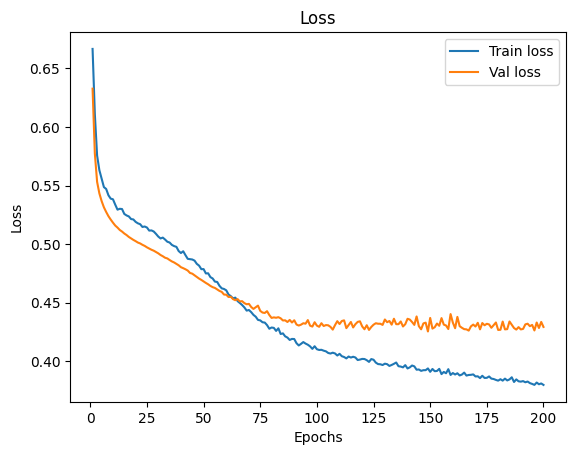

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs_i, losses_i, label = "Train loss")
plt.plot(epochs_i, val_losses_i, label = "Val loss")
plt.legend()
plt.show()

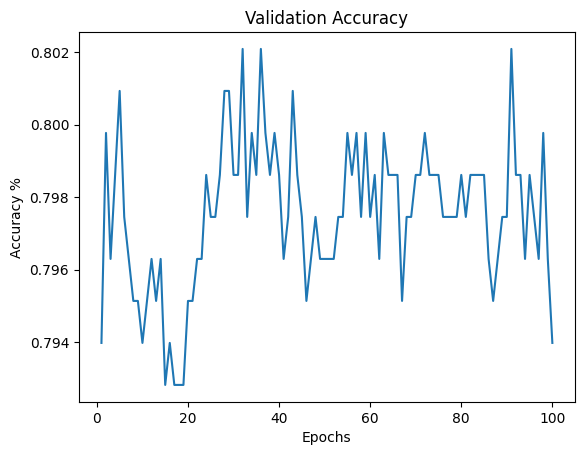

In [256]:
plt.figure()
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.plot(epochs_i, val_accs)
plt.show()

## Predictions

In [210]:
print(max_vals)

Age                79.0
RoomService     14327.0
FoodCourt       29813.0
ShoppingMall    23492.0
Spa             22408.0
VRDeck          24133.0
dtype: float64


In [201]:
# data = predict_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
# print(max_vals)
# predict_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = (data - min_vals)/(max_vals - min_vals)

predict_data.describe()
predict_data


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Cabin_num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,0,NaN
4274,9271_01,Mars,True,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,NaN,0.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [220]:
X_predict = pd.get_dummies(predict_data[features]).astype(float)

predictions = model.predict(X_predict)
output = pd.DataFrame({'PassengerId': predict_data.PassengerId, 'Transported': predictions})
output.to_csv('/notebooks/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
